In [1]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_pattern = " loss = (.*?), acc ="
val_pattern = "validation_loss = (.*?), validation_acc ="
valacc_pattern = ", validation_acc = (\d+\.\d+)"
trainacc_pattern = ", acc = (\d+\.\d+)"

In [14]:
data = pd.DataFrame()
lines=[]

filepath = 'mstcn_output_stage5.txt'
with open(filepath) as fp:
   line = fp.readline()
   while line:
       lines.append(line.strip())
       line = fp.readline()
        
data['lines'] = lines

In [15]:
def get_lossValue(pattern, s):
    value = re.search(pattern, s)
    if value:
        return float(value.group(1))
    else: return None

data['train_loss'] = data['lines'].apply(lambda x: get_lossValue(train_pattern, x))
data['val_loss'] = data['lines'].apply(lambda x: get_lossValue(val_pattern, x))
data['val_acc'] = data['lines'].apply(lambda x: get_lossValue(valacc_pattern, x))
data['train_acc'] = data['lines'].apply(lambda x: get_lossValue(trainacc_pattern, x))

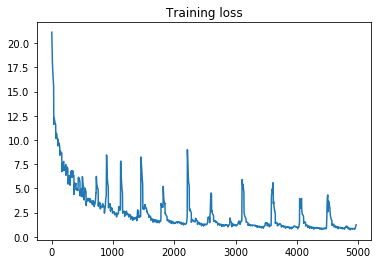

In [16]:
%matplotlib inline
plt.title('Training loss')
plt.plot(data['train_loss'].dropna())
plt.show()

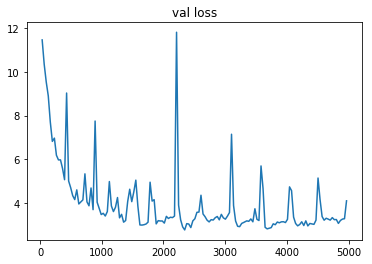

In [17]:
%matplotlib inline
plt.title('val loss')
plt.plot(data['val_loss'].dropna())
plt.show()

In [18]:
val_acc = data['val_acc'].dropna().reset_index(drop=True).tolist()

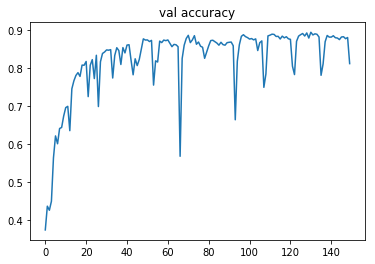

In [19]:
%matplotlib inline
plt.title('val accuracy')
plt.plot(range(len(val_acc)),val_acc)
plt.show()

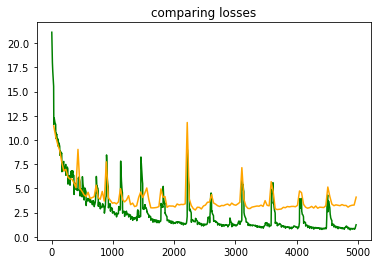

In [20]:
%matplotlib inline
plt.title('comparing losses')
plt.plot(data['train_loss'].dropna(), color="green")
plt.plot(data['val_loss'].dropna(), color="orange")
plt.show()

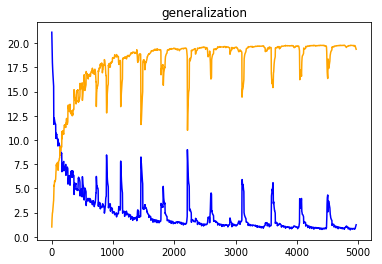

In [21]:
%matplotlib inline
plt.title('generalization')
plt.plot(data['train_loss'].dropna(), color="blue")
plt.plot(data['train_acc'].dropna() * 20, color="orange")
plt.show()

In [22]:
## index for highest val acc
data[data['val_acc'] == data['val_acc'].max()]

,lines,train_loss,val_loss,val_acc,train_acc
4341,"[epoch 131]: train_loss = 0.118775, train_acc ...",NaN,2.954534,0.894775,NaN


In [23]:
data[data['train_loss'] == data['train_loss'].min()]

,lines,train_loss,val_loss,val_acc,train_acc
4871,"batch_number = 10, loss = 0.715978, acc = 0.98...",0.715978,NaN,NaN,0.989221


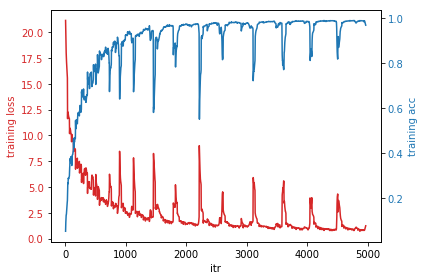

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('itr')
ax1.set_ylabel('training loss', color=color)
ax1.plot(data['train_loss'].dropna(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('training acc', color=color)  # we already handled the x-label with ax1
ax2.plot(data['train_acc'].dropna(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()